Writing to C:\Users\29429\AppData\Roaming\pip\pip.ini
Looking in indexes: https://mirrors.aliyun.com/pypi/simple


<Figure size 640x480 with 0 Axes>

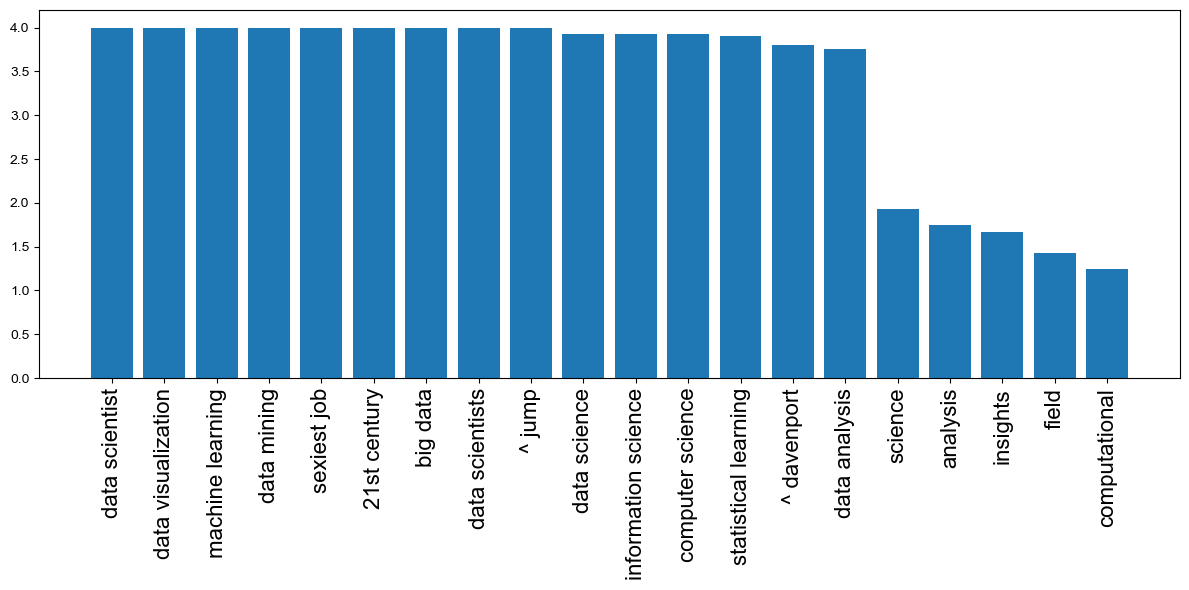

Looking in indexes: https://mirrors.aliyun.com/pypi/simple


FileNotFoundError: [Errno 2] No such file or directory: 'images/ds_wordcloud.png'

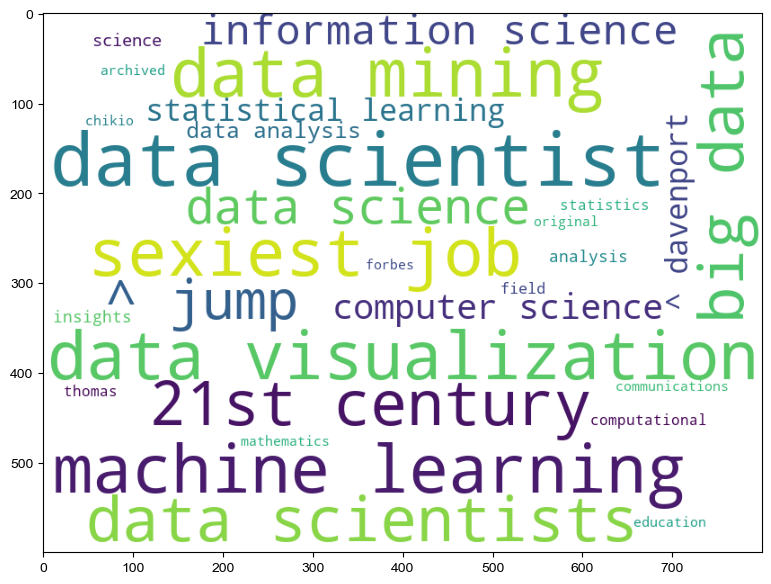

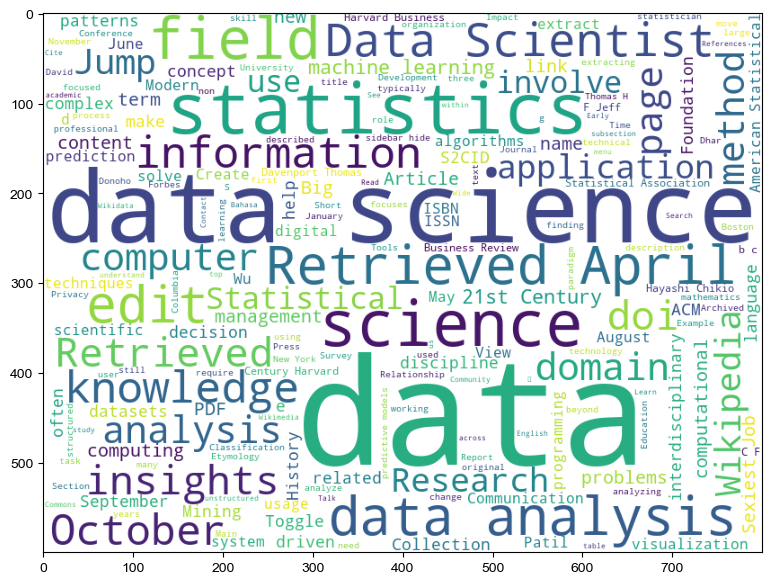

In [4]:
import requests
#url = 'https://en.wikipedia.org/wiki/Data_science'
url = 'http://127.0.0.1:5500/1-Introduction/01-defining-data-science/Data%20science%20-%20Wikipedia.html'
text = requests.get(url,timeout=500).content.decode('utf-8')

from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res

import sys
!{sys.executable} -m pip config set global.index-url https://mirrors.aliyun.com/pypi/simple
import sys
!{sys.executable} -m pip install nlp_rake

import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

import matplotlib.pyplot as plt

plt.gcf().subplots_adjust(left=0.05,top=0.91,bottom=0.09) 

plt.rcParams['font.family'] = ['Arial', 'Times New Roman']
plt.rcParams['axes.unicode_minus'] = False

def plot(pair_list):
    plt.figure(figsize=(12,6)).patch.set_facecolor('white')
    k,v = zip(*pair_list)
    #print(k,v)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical',fontsize=16)
    plt.tight_layout()
    plt.show()

plot(res[:20])

!{sys.executable} -m pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7)).patch.set_facecolor('white')
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

plt.figure(figsize=(15,7)).patch.set_facecolor('white')
plt.imshow(wc.generate(text))
wc.generate(text).to_file('images/ds_wordcloud.png')